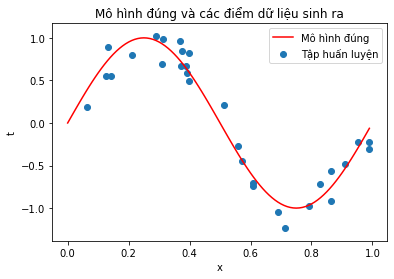

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# data size
N = 30

# get real value from the original curve
def getRealVal(X):
    return np.sin(2*np.pi*X)

# original data
X_data = np.random.uniform(0,1,N)
t_data = getRealVal(X_data) + np.random.uniform(-0.3,0.3,N)
x = np.arange(0,1,0.01)

# setting the plot
plt.title('Mô hình đúng và các điểm dữ liệu sinh ra')
plt.xlabel('x')
plt.ylabel('t')

# plot the original data
plt.plot(x, getRealVal(x), c='r', label='Mô hình đúng')
plt.scatter(X_data, t_data, label='Tập huấn luyện')
plt.legend()
plt.show()

In [3]:
# tranform X_data
def transformX(X):
    return np.array([np.array([x**i for i in range(M)]) for x in X])

# calculate cost
def calCost(X, t, w, B):
    return np.sum((t.reshape(B,1) - np.dot(X, w.reshape(M,1))**2)/(2*B))

# run gradient descent
def gradientDescent(X, t, w, B):
    cost_log = np.empty((0))
    new_X = np.copy(X)
    new_t = np.copy(t)
    idx = np.arange(B)
    for i in range(epoch):
        np.random.shuffle(idx)
        new_X = new_X[idx]
        new_t = new_t[idx]
        gradient = np.dot(new_X.T, np.dot(new_X, w.reshape(M,1)) - new_t.reshape(B,1))/B
        w = w.reshape(M,1) - lr*gradient
        cost_log = np.append(cost_log, calCost(new_X, new_t, w, B))
    return w, cost_log

# get predict value
def getPrediction(X, w):
    return np.dot(transformX(X),w)

In [4]:
# numbers of feature
M = 5

# init w
w = np.array([1 for i in range(M)])

# epoch
epoch = 10000

# learning rate
lr = 0.5

[[  0.29629472]
 [  5.20563039]
 [-11.88859098]
 [ -3.8801996 ]
 [ 10.25619203]]


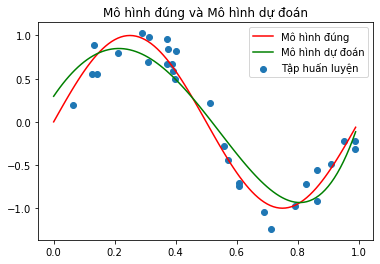

In [5]:
# transform X_data
X_ = transformX(X_data)

(last_w, cost_log) = gradientDescent(X_, t_data, w, N)
print(last_w)

# plot the result
plt.title('Mô hình đúng và Mô hình dự đoán')
plt.scatter(X_data, t_data, label='Tập huấn luyện')
plt.plot(x, getRealVal(x), c='r', label='Mô hình đúng')
plt.plot(x, getPrediction(x, last_w), c='g', label='Mô hình dự đoán')
plt.legend()
plt.show()